# Gerador aux relatório

In [58]:
#files = ['pr1002']
files = ['a280', 'berlin52', 'eil101', 'tsp225', 'pr1002']
#files = ['a280', 'berlin52', 'eli101', 'tsp225', 'pr1002', 'd18512']

enable_mst = True
enable_tour = False
percentage_delta = 0.01

In [59]:
%%capture

!make clean
!make

In [60]:
from os import system

for file in files:
    file_path = f'exemplos/in/{file}.tsp'
    print(f'Running {file_path}')
    system(f'./trab1 {file_path}')

print('Done')

Running exemplos/in/a280.tsp
Running exemplos/in/berlin52.tsp
Running exemplos/in/eil101.tsp
Running exemplos/in/tsp225.tsp
Running exemplos/in/pr1002.tsp
Done


In [61]:
%%capture

# Plot dos exemplos no Jupyter Notebook já que o vadio o vadio do Jheam, que usa WSL,
# não tem backend de GUI pra plotar imagens

import tsp_plot
import matplotlib.pyplot as plt

has_diffs = []
for file in files:
    diff = tsp_plot.produce_diff(f'exemplos/in/{file}.tsp', f'exemplos/mst/{file}.mst' if enable_mst else '', f'{file}.mst', f'exemplos/tour/{file}.tour' if enable_tour else '', f'{file}.tour', percentage_delta)
    has_diffs.append(diff)

diffs = list(zip(files, has_diffs))

MST TESTS
a280: OK
berlin52: OK
eil101: OK
tsp225: OK
pr1002: FAIL


<Figure size 640x480 with 0 Axes>

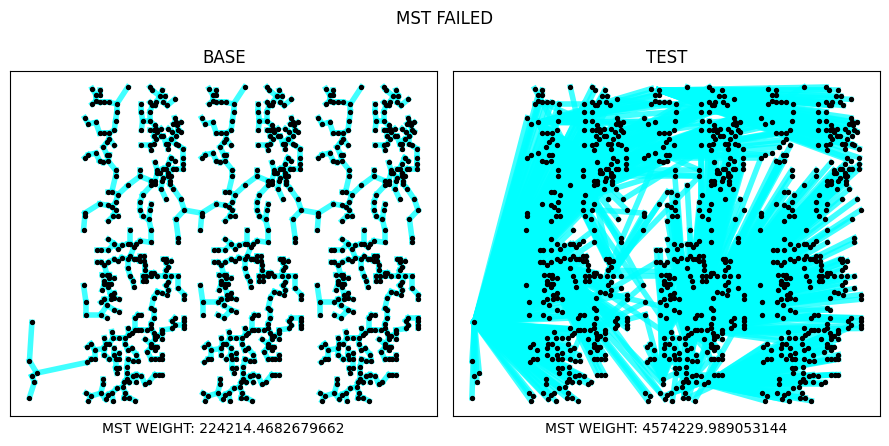

In [62]:
# MST TESTS

if enable_mst:
    print('MST TESTS')
    for file, has_diff in diffs:
        print(f'{file}: {"OK" if not has_diff else "FAIL"}')

    for file, has_diff in diffs:
        if not has_diff:
            continue
        tsp_plot.produce_diff(f'exemplos/in/{file}.tsp', f'exemplos/mst/{file}.mst' if enable_mst else '', f'{file}.mst', '', '', percentage_delta)
else:
    print('MST TESTS SKIPPED')

In [63]:
# TOUR TESTS

if enable_tour:
    print('TOUR TESTS')
    for file, has_diff in diffs:
        print(f'{file}: {"OK" if not has_diff else "FAIL"}')

    for file, has_diff in diffs:
        if not has_diff:
            continue
        tsp_plot.produce_diff(f'exemplos/in/{file}.tsp', '', '', f'exemplos/tour/{file}.tour' if enable_tour else '', f'{file}.tour', percentage_delta)
else:
    print('TOUR TESTS SKIPPED')

TOUR TESTS SKIPPED
